### Get distance_from_others data from combined_replicates/

In [10]:
import json
import numpy as np
import plotly.plotly as py
import matplotlib as mpl
from matplotlib import cycler
# mpl.use('Agg')
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.graph_objs as go
import os
import glob2
import re
import os

In [11]:
plt.style.use('seaborn-white')
plt.rcParams['font.sans-serif'] = "Arial"
plt.rcParams['font.size'] = 14
plt.rcParams['axes.labelsize'] = 14
plt.rcParams['axes.labelweight'] = 'normal'
plt.rcParams['xtick.labelsize'] = 14
plt.rcParams['ytick.labelsize'] = 14
plt.rcParams['legend.fontsize'] = 10
plt.rcParams['figure.titlesize'] = 14
plt.rcParams['lines.linewidth'] = 1
params = {"ytick.color" : "#000000",
          "xtick.color" : "#000000",
          "axes.labelcolor" : "#000000",
          "axes.edgecolor" : "#000000",
          "text.color": "#000000"}
plt.rcParams.update(params)

### Get distances to 49 others for 1 bee over 160 timesteps

In [5]:
def get_data_1_bee(data, replicate_i, bee_start_i):
    # Loop over 50 lists in 1 timestep
    # Each list is 1 bee and its distance to 49 other bees at this timestep
    # List of 160 lists, each list has 50 values
    one_bee_160_t = []
    
    # Loop over 160 timesteps here
    # number_of_distances = len(data[0]["Replicate 1"]["distance_from_others"])
    number_of_distances = len(data[0])
    
    for bee in range(bee_start_i, number_of_distances, 51):  # for other bees: every 101?
        # dist_to_49_others = data[replicate_i]["Replicate {}".format(replicate_i+1)]["distance_from_others"][bee]["distances"]
        dist_to_49_others = data[replicate_i][bee]["distances"]
        one_bee_160_t.append(dist_to_49_others)

    return one_bee_160_t


### Threshold nearest neighbors at max = 2 distance units 

In [6]:
def get_avg_neighbor_distances(data_list):
    # Loop over each timestep list
    # List of 160 floats for 1 bee's average distance from neighbors over time
    nearest_neighbors = []

    for t_list in data_list:
        # 160 avg values for distance to nearest neighbors
        # Threshold nearest neighbors at max = 2 distance units
        avg_list = []
        for val in t_list:
            if val <= 2:
                avg_list.append(val)
                # print(val)
        nearest_neighbors.append(np.mean(avg_list))

    return nearest_neighbors

### Use get_data_1_bee & get_avg_neighbor_distances to get 50 lists for 50 bees -- in 1 replicate  -- later average over all 10 replicates

In [7]:
def get_distances_50_bees(data, replicate_i):
    # List of 50 lists 
    neighbor_distances_all_bees = [] 

    for i in range(51):
        # print(i)
        one_bee = get_data_1_bee(data, replicate_i, i)
        avg_distances = get_avg_neighbor_distances(one_bee)
        neighbor_distances_all_bees.append(avg_distances)
        
    return neighbor_distances_all_bees

In [8]:
def all_bees_all_time(data, replicate_i):
    ''' For 1 replicate swarm, get list of all bees avg distance
    from nearest neighbors over all 160 timesteps '''

    # Avg over all 50 bees for each of 160 timesteps
    # Get a list of 160 values
    all_distances = get_distances_50_bees(data, replicate_i)
    
    all_bees_over_time = []
    for i in range(320):
        # For each timestep, i, get values of each of the 50 bees at that i 
        one_t = [item[i] for item in all_distances]
        # Get the avg of of all bees at the timestep
        avg_all_bees = np.mean(one_t)
        all_bees_over_time.append(avg_all_bees)
        
    return all_bees_over_time

### Average over all replicates in JSON

In [9]:
def avg_all_replicates(data_json):
    # Get all replicates' lists into a list
    all_replicates = []
    for i in range(len(data_json)):
        one_replicate_data = all_bees_all_time(data_json, i)
        all_replicates.append(one_replicate_data)
        
    # Store means of 10 replicates
    all_reps_avgs = []

    # Also get min and max for range in plotting 
    mins = np.min(all_replicates, axis=0)
    maxs = np.max(all_replicates, axis=0)
    
    data = {
        "all" : all_replicates,
        "min" : mins,
        "max" : maxs
    }

    return data

- Colorbrewer: http://colorbrewer2.org/#type=sequential&scheme=YlGnBu&n=5
- tsplot: https://seaborn.pydata.org/generated/seaborn.tsplot.html

In [22]:
def standardize_filenames(fname):
    # fname = "Q0.15_W0.0005_D0.5_T0.005_wb1.json"
    split_list = fname.split("_")

    new_name = ""
    for item in split_list:
        if "Q" in item:
            new_name += item + "_"
        elif "W" in item and len(item) < 7:
            new_length = 7 - len(item)
            new_name += item + "0"*new_length + "_"
        elif "D" in item and len(item) < 6:
            new_length = 6 - len(item)
            new_name += item + "0"*new_length + "_"
        elif "T" in item and len(item) < 7:
            new_length = 7 - len(item)
            new_name += item + "0"*new_length + "_"
        elif "wb" in item:
            new_name += item
        else:
            new_name += item + "_"

    return new_name

In [ ]:
# Standardize filenames
path = '/Users/dieumynguyen/Desktop/Projects/bee_communication/step3_get_distance_bw_workers/distance_bw_workers'
files = os.listdir(path)
for file in files:
    os.rename(os.path.join(path, file), os.path.join(path, standardize_filenames(file)))

# Get list of files in correct order
# Insert T value. Later make a loop to go through all T's. 
reps_list = list(map(lambda x : x.split("/")[-1], glob2.glob("distance_bw_workers/*T0.5*.json")))
reps_list = reps_list[::-1]
updated_reps_list = sorted(reps_list, key = lambda x: (x.split("_")[1], x[2]))[::-1]
# updated_reps_list

/Users/dieumynguyen/anaconda3/lib/python3.6/site-packages/seaborn/timeseries.py:183: UserWarning:

The tsplot function is deprecated and will be removed or replaced (in a substantially altered version) in a future release.



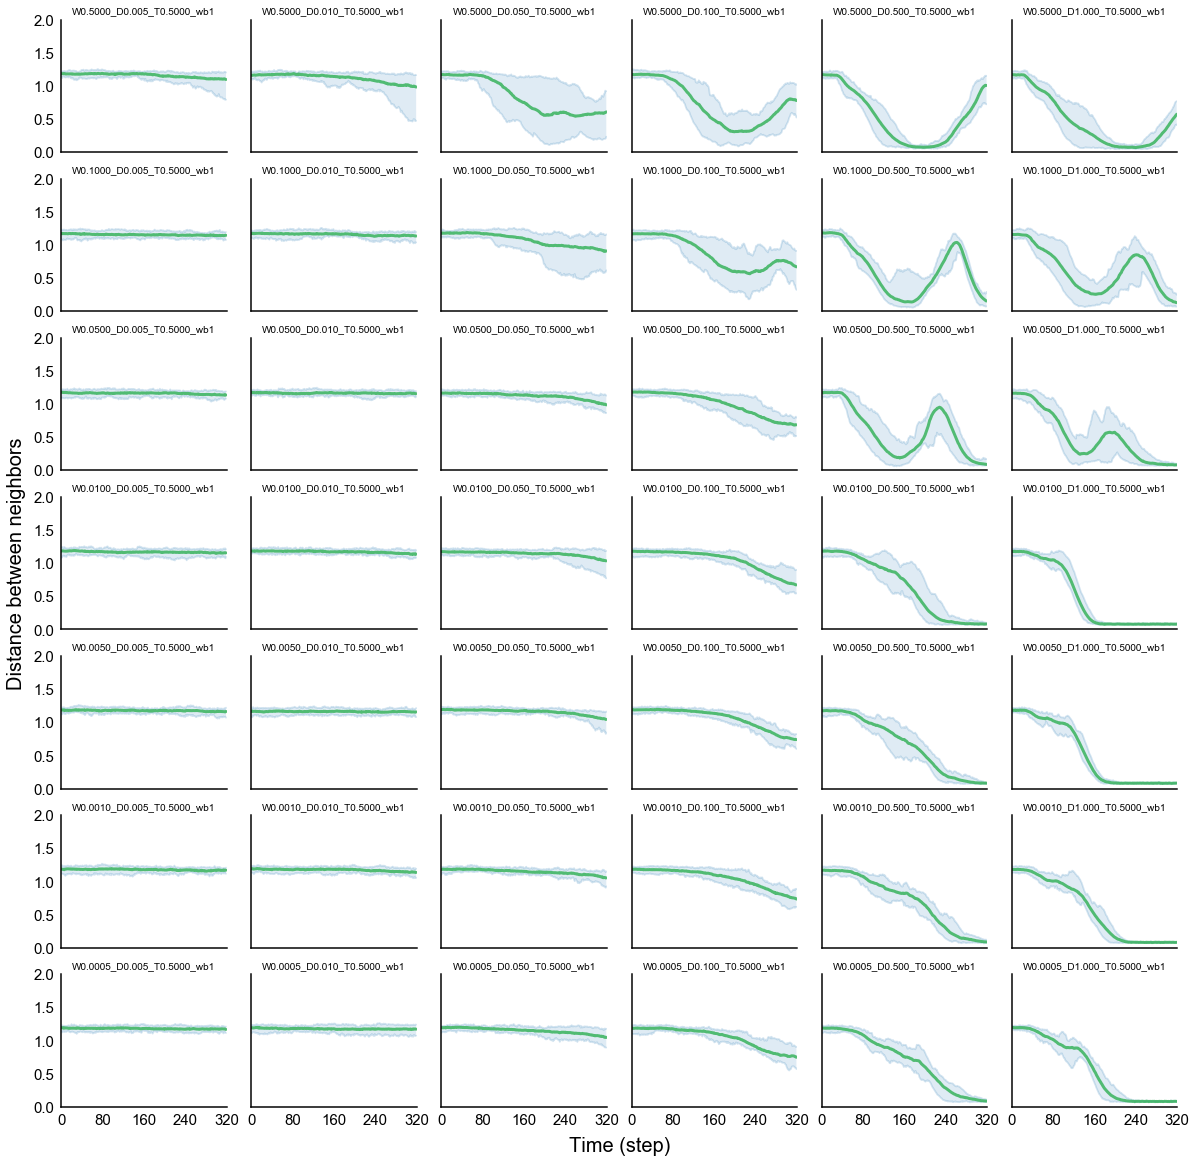

In [30]:
# Start plotting!
fig, axes = plt.subplots(7, 6, sharex=True, sharey=True, figsize=(20,20))

# Plot subplots
for j, ax in enumerate(axes.flatten()):
    with open("distance_bw_workers/" + updated_reps_list[j], "r") as f:
        data = json.load(f)
    bee_data = avg_all_replicates(data)
    # fig, ax = plt.subplots(1, figsize=(8, 5))
    sns.set(font_scale = 1.5)
    sns.set_style("whitegrid", {'axes.grid' : False, 'text.color': '#000000', 
                                'axes.labelcolor': '#000000', 
                                'xtick.color': '#000000',
                                'ytick.color': '#000000',
                                'axes.linewidth': 1.5,
                               'axes.edgecolor': '#000000'})
    
    ax.spines['right'].set_visible(False)
    ax.spines['top'].set_visible(False)

    # Setup minmax bounds
    ax.plot(bee_data["min"], color='#2c7fb8', alpha=0.2)
    ax.plot(bee_data["max"], color='#2c7fb8', alpha=0.2)
    
    # Fill between minmax bounds
    ax.fill_between([i for i in range(len(bee_data["min"]))], bee_data["min"], bee_data["max"], 
                    where = bee_data["max"] >= bee_data["min"], facecolor='#2c7fb8', alpha=0.15, interpolate=True)

    # Average with stds 68 and 95
    g = sns.tsplot(data=bee_data["all"], estimator=np.mean, color="#2eaf53", alpha=0.8, ci=[68, 95], ax=ax, err_kws={"color" : "#a1dab4", "alpha" : 0.})
    g.lines[2].set_linewidth(3)
    g.set(ylim=(0,2))
    
    processed_fname = f.name[26:-5]
    
    ax.xaxis.set_major_locator(plt.MaxNLocator(5))
    ax.yaxis.set_major_locator(plt.MaxNLocator(4))
    
    plt.xlim(0, 320)
    plt.ylim(0, 2)
    
    # ax.set(xlabel='Time (step)', ylabel='Distance between neighbors')
    ax.set_title("{}".format(processed_fname), fontsize=10)

ax = fig.add_subplot(111, frameon=False)
ax.set_xticks([])
ax.set_yticks([])
ax.set_xlabel('Time (step)', labelpad=30, fontsize=20) # Use argument `labelpad` to move label downwards.
ax.set_ylabel('Distance between neighbors', labelpad=35, fontsize=20)

fig.subplots_adjust(wspace=0.15, hspace=0.2)

# Save figure as a single pdf
plt.savefig("/Users/dieumynguyen/Desktop/Projects/bee_communication/figures/distance_bw_workers/Threshold0.5_DistanceBwNeighbors.pdf", transparent=True)

    
plt.show()    
